# Week 3: Calculus (cont'd)

In [1]:
# Load libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

# To make 3D graphs "interactive" install pympl
#%matplotlib widget

## Day 3: Numerical Optimization (Multivariable Functions)
* Here we continue with the process of fining minimum and maximum points for multivariable functions
* Like earlier, we will be using **numerical optimization** methods to find an approximate minima

### Gradient Descent Method
* We will modify the Gradient Descent Method to work for multivariable functions
* Let $f(x, y)$ be a function of two variables $x$ and $y$, and let $f_x(x, y)$ and $f_y(x, y)$ be its partial derivatives.
* Starting with some initial approximation $(x_0, y_0)$, we generate a sequence of points $(x_1, y_1), (x_2, y_2), \ldots$ which approaches a local minimum $(x^*, y^*)$
* To obtain the next point in the sequence $(x_{k+1}, y_{k+1})$ from the current point $(x_k, y_k)$ we use the following recursive relations:
\begin{equation}\left\{
\begin{array}{rcl}
    x_{k+1} &=& x_k - \alpha\cdot f_x(x_k, y_k)\\
    y_{k+1} &=& y_k - \alpha\cdot f_y(x_k, y_k)
\end{array}\right.
\end{equation}
where $\alpha$ is the learning rate of the algorithm.
* Alternatively, if we label the points $\mathbf{x}_k = (x_k, y_k)$, and the gradient $\nabla f(\mathbf{x}_k)$, then the recursive relation can be expresed as:
\begin{equation}
    \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \cdot \nabla f(\mathbf{x}_k)
\end{equation}
* The algorithm stops either when the number of iterations $k$ has reached the preset maximum $max\_iter$, or when the Euclidean norm of the gradient at $\mathbf{x}_k$ given by $\|\nabla f(\mathbf{x}_k)\|_2$ becomes less than the preset tolerance $tol$.

### Example 1
* Find the minimum of the function $f(x, y) = x^2 + y^2 + 1$ using the Gradient Descent Method. Use $(x_0, y_0) = (-5, 7)$ and $\alpha = 0.1$, with maximum number of allowed iterations $max\_iter = 500$ and tolerance $tol = 10^{-6}$
* This function has only one minimum point $(x^*, y^*) = (0. 0)$ with a minimum value $f(x^*, y^*) = 1$

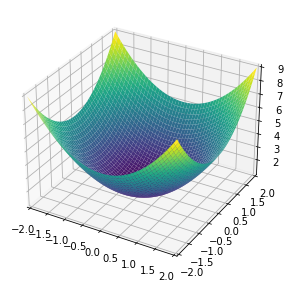

In [2]:
# Define the variables and the function

x, y = sp.symbols('x y', real=True)
f = sp.Function('f', real=True)

f = x**2 + y**2 + 1

# Plot the function, just for fun

sp.plotting.plot3d(f, (x, -2, 2), (y, -2, 2))

In [3]:
# Calculating the partial derivatives of f

f_x = f.diff(x)
f_y = f.diff(y)

f, f_x, f_y

(x**2 + y**2 + 1, 2*x, 2*y)

In [4]:
# Define numpy functions for the function and its gradient
# x --> x[0]
# y --> y[0]

def func(x):
    return x[0]**2 + x[1]**2 + 1

def grad(x):
    return np.array([2*x[0], 2*x[1]])

In [5]:
xk = np.array([-5, 7])
alpha = 0.1
max_iter = 500
tol = 1e-6
k = 0

while (k < max_iter) and (np.linalg.norm(grad(xk), 2) >= tol):
    xk = xk - alpha*grad(xk)
    k += 1

print('xk = ', xk)
print('f(xk) = ', func(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad(xk), 2))

xk =  [-2.69599467e-07  3.77439253e-07]
f(xk) =  1.0000000000002152
k =  75
|grad| =  9.276729216518059e-07


### Example 2
* Find the minimum of the function $g(x, y) = \frac{x - y}{x^2 + y^2 + 1}$ using the Gradient Descent Method. Use $(x_0, y_0) = (0.5, -0.5)$ and $\alpha = 2$, with maximum number of allowed iterations $max\_iter = 500$ and tolerance $tol = 10^{-6}$

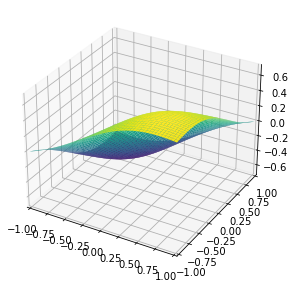

In [6]:
g = (x - y)/(x**2 + y**2 + 1)
sp.plotting.plot3d(g, (x, -1, 1), (y, -1, 1))

In [7]:
x, y = sp.symbols('x[0] x[1]')
g = sp.Function('g', real=True)
g = (x - y)/(x**2 + y**2 + 1)

g_x = g.diff(x)
g_y = g.diff(y)

print(g)
print(g_x)
print(g_y)

def g(x):
    return (x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)

def grad_g(x):
    return np.array([ -2*x[0]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 + 1/(x[0]**2 + x[1]**2 + 1), -2*x[1]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 - 1/(x[0]**2 + x[1]**2 + 1) ])


xk = np.array([0.5, -0.5])
alpha = 2
max_iter = 500
tol = 1e-6
k = 0

while (k < max_iter) and (np.linalg.norm(grad_g(xk), 2) >= tol):
    xk = xk - alpha*grad_g(xk)
    k += 1

print('xk = ', xk)
print('g(xk) = ', g(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad_g(xk), 2))

(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)
-2*x[0]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 + 1/(x[0]**2 + x[1]**2 + 1)
-2*x[1]*(x[0] - x[1])/(x[0]**2 + x[1]**2 + 1)**2 - 1/(x[0]**2 + x[1]**2 + 1)
xk =  [-0.7071077  0.7071077]
g(xk) =  -0.7071067811859486
k =  19
|grad| =  9.202362858481398e-07


### Example 2a
* Under the same conditions, find the maximum point of the function $g(x, y)$ from **Example 2**

In [8]:
# Define the function -g(x, y)
xk = np.array([0.5, -0.5])
alpha = 2
max_iter = 500
tol = 1e-6
k = 0

while (k < max_iter) and (np.linalg.norm(grad_g(xk), 2) >= tol):
    xk = xk + alpha*grad_g(xk)
    k += 1

print('xk = ', xk)
print('g(xk) = ', g(xk))
print('k = ', k)
print('|grad| = ', np.linalg.norm(grad_g(xk), 2))

xk =  [ 0.70710749 -0.70710749]
g(xk) =  0.7071067811861912
k =  14
|grad| =  7.097290933435598e-07


### Putting the all of it together in a single function
* Write a Python function that will be an implementation of the Gradient Descent Method
* Input arguments are:
    * The function $f$ and its gradient $grad$
    * Initial approximation $x_0$
    * Learning rate *alpha*, by default set to 0.01
    * Maximum number of iterations *max_iter*, by default set to 1000
    * Tolerance level for the gradient *tol*, by default set to 1e-6
* Output argoments are:
    * The minimum $x^*$
    * The minimum value $f(x^*)$
    * The Euclidean norm of the gradient at the minimum, $\left\|\nabla f(x^*)\right\|$
    * The number of iterations it took to obtain the result

In [15]:
def gradient_descent(f, grad, x0, alpha = 0.01, mode = 'min', max_iter = 1000, tol = 1e-6):
    # initialize the sequence
    k = 0
    xk = x0
    grad_k = grad(x0)
    
    while (k < max_iter) and (np.linalg.norm(grad_k, 2) >= tol):
        k += 1
        if mode == 'min':
            xk = xk - alpha*grad_k
        else:
            xk = xk + alpha*grad_k
            
        grad_k = grad(xk)
        
    print('xk = ', xk)
    print('g(xk) = ', f(xk))
    print('k = ', k)
    print('|grad| = ', np.linalg.norm(grad_k, 2))
    
    return xk, f(xk), np.linalg.norm(grad_k, 2), k

In [16]:
# Test if the function works ok
x0 = np.array([0.5, -0.5])

gradient_descent(g, grad_g, x0, alpha=2.0)

xk =  [-0.7071077  0.7071077]
g(xk) =  -0.7071067811859486
k =  19
|grad| =  9.202362858481398e-07


(array([-0.7071077,  0.7071077]),
 -0.7071067811859486,
 9.202362858481398e-07,
 19)

### Example 3
* Find the minimum of the function $f(\mathbf{x}) = (x_1 - 2)^4 + (x_1 - 2)^2 \cdot x_2^2 + (x_2 + 1)^2$ where $\mathbf{x} = (x_1, x_2)$ starting with an initial approximation $\mathbf{x}_0 = (1, 1)$

In [11]:
# Define variables and function
x1, x2 = sp.symbols('x[0] x[1]', real=True)
f = sp.Function('f', real=True)
f = (x1 - 2)**4 + (x1 - 2)**2 * x2**2 + (x2 + 1)**2



def f(x):
    return 

def grad(x):
    return 

x0 = np.array([1, 1])
gradient_descent()

TypeError: gradient_descent() missing 3 required positional arguments: 'f', 'grad', and 'x0'

### Example 4
* Find the minimum of the function $f(\mathbf{x}) = (1 - x_1)^2 + (2 - x_2)^2 + (3 - x_3)^2 + 4(1 - x_4)^2$ using the gradient descent method and an initial approximation $\mathbf{x}_0 = (-2, -1, 1, 2)$

In [18]:
# Define variables and function
x1, x2, x3, x4 = sp.symbols('x[0] x[1] x[2] x[3]', real=True)
f = sp.Function('f', real=True)
f = (1 - x1)**2 + (2 - x2)**2 + (3 - x3)**2 + 4*(1 - x4)**2

print(f)
print(f.diff(x1))
print(f.diff(x2))
print(f.diff(x3))
print(f.diff(x4))

(1 - x[0])**2 + 4*(1 - x[3])**2 + (2 - x[1])**2 + (3 - x[2])**2
2*x[0] - 2
2*x[1] - 4
2*x[2] - 6
8*x[3] - 8


In [19]:
def f(x):
    return (1 - x[0])**2 + 4*(1 - x[3])**2 + (2 - x[1])**2 + (3 - x[2])**2

def grad(x):
    return np.array( [ 
        2*x[0] - 2,
        2*x[1] - 4,
        2*x[2] - 6,
        8*x[3] - 8
    ])

In [20]:
x0 = np.array([-2, -1, 1, 2])
gradient_descent(f, grad, x0)

xk =  [0.99999968 1.99999968 2.99999979 1.        ]
g(xk) =  2.465375251869951e-13
k =  795
|grad| =  9.93050905416223e-07


(array([0.99999968, 1.99999968, 2.99999979, 1.        ]),
 2.465375251869951e-13,
 9.93050905416223e-07,
 795)

### Example 3: Rosenbrock's Function
* Find the minimum of the function $r(x, y) = 100(y - x^2)^2 + (1 - x)^2$ using the Gradient Descent Method. Use $(x_0, y_0) = (-1.2, 1.0)$, with maximum number of allowed iterations $max\_iter = 10000$ and tolerance $tol = 10^{-6}$. You will have to tune the value of the learning rate $\alpha$ by trial-and-error.

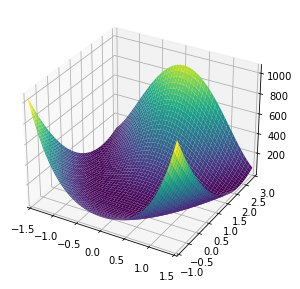

In [22]:
# Rosenbrock's Function
x, y = sp.symbols('x[0] x[1]')
ros = sp.Function('f', real=True)
ros = 100*(y - x**2)**2 + (1 - x)**2



sp.plotting.plot3d(ros, (x, -1.5, 1.5), (y, -1, 3))

In [ ]:
def r(x):
    return 

def grad_r(x):
    return 

In [ ]:
x0 = np.array([-1.2, 1.0])
gradient_descent(r, grad_r, x0, alpha = 0.006, max_iter=10000)

#out = opt.minimize()

### Example: solving systems of equations using optimization
* A system of equations given by $A\mathbf{x} = b$ where $A$ is a matrix, $b$ is a vector, and $\mathbf{x}$ is the solution can be solved using optimization tools
* The approach takes advandage of the fact that any norm is either positive or zero, and that the norm of the zero-vector $\mathbf{O}$ is always zero. It works like this: start with the system
\begin{equation}
A\mathbf{x} = b
\end{equation}
Rewrite:
\begin{equation}
A\mathbf{x} - b = \mathbf{O}
\end{equation}
Calculate Euclidean norm on both sides of the equation:
\begin{equation}
\left\| A\mathbf{x} - b \right\| = \|\mathbf{O}\|
\end{equation}
Since $\|\mathbf{O}\| = 0$, then:
\begin{equation}
\left\| A\mathbf{x} - b \right\| = 0
\end{equation}
To make life easier, we want to remove the square root from the Euclidean norm on the left-hand side, so we square both sides:
\begin{equation}
\left\| A\mathbf{x} - b \right\|^2 = 0
\end{equation}
Bottom line: if $\mathbf{x}$ is solution to the system $A\mathbf{x} = b$, then $\mathbf{x}$ is minimum of the function $f(\mathbf{x}) = \left\| A\mathbf{x} - b \right\|^2$. Thus, to solve a system of equations, the only thing we need to do is define the function $f$ and minimize it.

* Solve the system:
\begin{equation}
\left\{
\begin{array}{rcl}
x + y + z &=& 6\\
2x - y + z &=& 3\\
3x + y - z &=& 2
\end{array}
\right.
\end{equation}

In [ ]:
# Define varibales and matrices
A = sp.Matrix([[1, 1, 1], [2, -1, 1], [3, 1, -1]])
b = sp.Matrix([6, 3, 2])
x, y, z, X = sp.symbols('x[0] x[1] x[2] X', real=True)
X = sp.Matrix([x, y, z])

# Define the function f
f = sp.Function('f', real=True)
f = ((A*X - b).norm())**2

# Define the numpy function f


def f(x):
    return 

def grad(x):
    return 

x0 = np.array([6, -1, 1])
gradient_descent()

opt.minimize()